# TITANIC DATASET ANALYSIS

For this I have workied with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

I have tried to predict a classification- survival or deceased.

I have used a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this notebook.

## Importing Libraries

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

## Data

In [381]:
train = pd.read_csv('titanic_train.csv')

In [382]:
train.head() #checking train dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [383]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### CHECKING FOR MISSING DATA

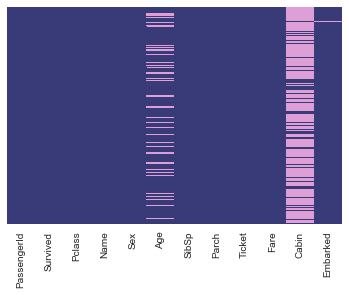

In [384]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='tab20b')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like it is just missing too much of that data to do something useful with at a basic level.


# EXPLORATORY ANALYSIS ON THE DATASET


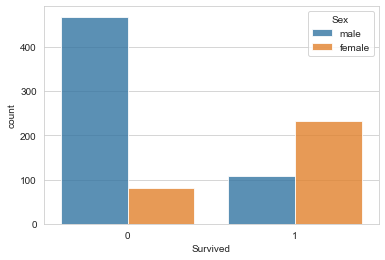

In [385]:
sns.countplot(x='Survived', data=train, hue="Sex", alpha=0.8)

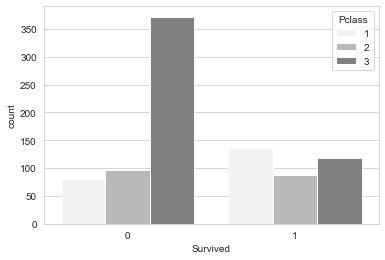

In [386]:
sns.countplot(x='Survived', hue= 'Pclass', data=train, color= "gray" )

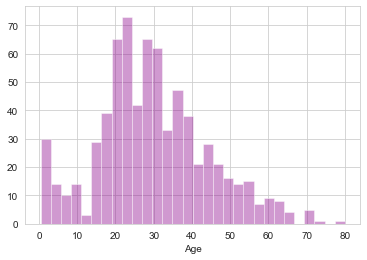

In [387]:
sns.distplot(train['Age'], kde=False, bins=30, color="darkmagenta")

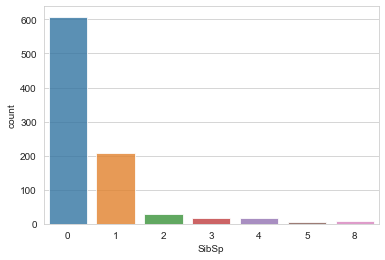

In [388]:
sns.countplot(x='SibSp', data= train, alpha=0.8)

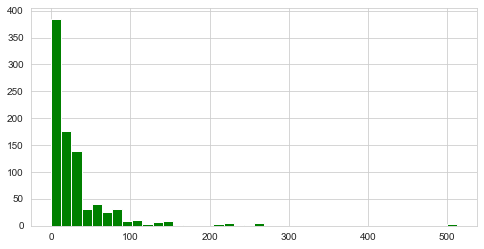

In [389]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# DATA CLEANING

### Imputation

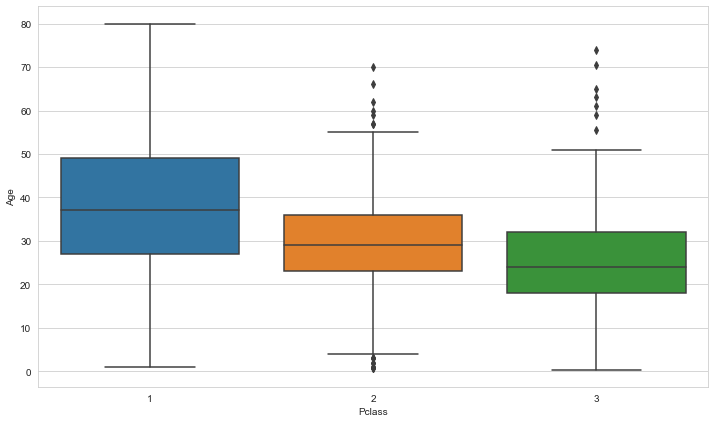

In [390]:
plt.figure(figsize= (12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [391]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return round( train[(train['Pclass']==1)]['Age'].mean() )
        elif Pclass==2:
            return round( train[(train['Pclass']==2)]['Age'].mean() )
        else:
            return round( train[(train['Pclass']==3)]['Age'].mean() )
    else:
        return Age

In [392]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [393]:
train.drop('Cabin', axis=1, inplace=True)

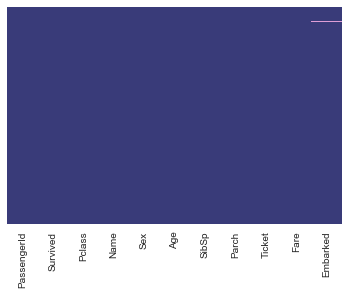

In [394]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='tab20b')

In [395]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [396]:
train.dropna(inplace=True)

## Converting Categorical Features

In [397]:
sex= pd.get_dummies(train['Sex'], drop_first=True)

In [398]:
embark= pd.get_dummies(train['Embarked'], drop_first=True) 

In [399]:
pd.concat([train, sex, embark], axis=1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [400]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [401]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Building a Logistic Regression Model 

### Train Test Split

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training and Prediction

In [404]:
from sklearn.linear_model import LogisticRegression

In [405]:
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [406]:
predictions = logmodel.predict(X_test)

### Evaluation

In [407]:
from sklearn.metrics import classification_report

In [408]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267

